In [88]:
import pandas as pd

In [89]:
# Read all excel sheets 2016-2023 into a dictionary
raw = pd.read_excel('/Users/sophiagray/Desktop/AA 500 - Tools & Techniques /TIPS project/MSA 2024 STUDENT TIPS spreadsheet.xlsx', sheet_name=None)

In [90]:
# Combine all sheets into one dataframe
all_data = pd.concat(raw.values(), ignore_index=True)
all_data.head(5)

,TIP #1,TIP #2,TIP #3,Anything else you want to mention? [this can be more TIPS if you are overflowing with advice],Anything else you want to mention?
0,NaN,NaN,NaN,NaN,NaN
1,Keep in mind before the class: where have we b...,Remember to clean the kitchen,NaN,NaN,NaN
2,prioritize life outside of the IAA so you don'...,NaN,start the data visualization project way earli...,NaN,NaN
3,"When they say ""trust the process,"" you actuall...",you are expected to maintain an A/B grade poin...,"Fall 2 is the most stressful, fast-paced semes...",Don't worry about the TIPS project so much. It...,NaN
4,when you are interested in an analytic group ...,If you are coming into the program after havin...,"Depending on your cohort, you may or may not m...","Put your mental health and relationships, abov...",NaN


In [91]:
# Condense the data frame to a single column
flattened_data = pd.melt(all_data, value_vars=all_data.columns)
flattened_data.head(5)

,variable,value
0,TIP #1,NaN
1,TIP #1,Keep in mind before the class: where have we b...
2,TIP #1,prioritize life outside of the IAA so you don'...
3,TIP #1,"When they say ""trust the process,"" you actuall..."
4,TIP #1,when you are interested in an analytic group ...


In [92]:
# Remove missing values
flattened_data_clean = flattened_data.dropna()
flattened_data_clean.head(5)

,variable,value
1,TIP #1,Keep in mind before the class: where have we b...
2,TIP #1,prioritize life outside of the IAA so you don'...
3,TIP #1,"When they say ""trust the process,"" you actuall..."
4,TIP #1,when you are interested in an analytic group ...
5,TIP #1,Take good care of yourself. Getting adequate s...


In [93]:
all_tips = flattened_data_clean[['value']]
all_tips.head(5)


,value
1,Keep in mind before the class: where have we b...
2,prioritize life outside of the IAA so you don'...
3,"When they say ""trust the process,"" you actuall..."
4,when you are interested in an analytic group ...
5,Take good care of yourself. Getting adequate s...


In [94]:
# Combine all the rows in the all_tips dataframe to a single string
word_list = ' '.join(all_tips['value'].astype('str'))


In [95]:
# Convert the string to a list where each element is a word 
# make everything lowercase with .lower()
word_list = word_list.lower().split()


In [96]:
import nltk
from nltk.corpus import stopwords


In [97]:
stop_words = set(stopwords.words('english'))
len(stop_words)

179

In [98]:
extra_stop = ['get','make','take','much','really']

In [99]:
# Remove stop words from the list
word_list = [word for word in word_list if word not in stop_words and word not in extra_stop]



In [100]:
from collections import Counter
import re

In [101]:
word_counts = Counter(word_list)



In [105]:
most_common_words = word_counts.most_common(10)
most_common_words


[('time', 302),
 ('work', 184),
 ('program', 180),
 ('learn', 167),
 ('know', 160),
 ('people', 153),
 ('help', 151),
 ('try', 132),
 ('job', 120),
 ('go', 119)]

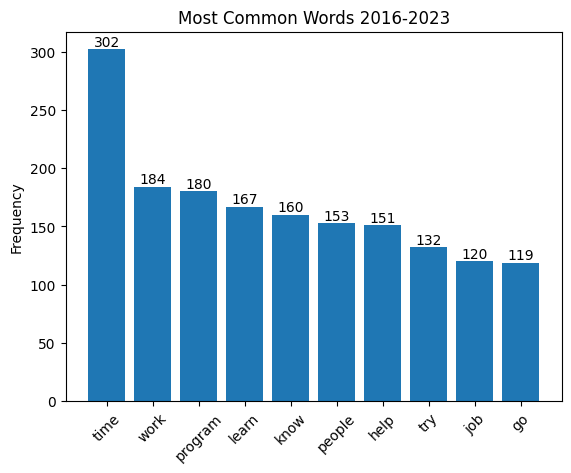

In [106]:
import matplotlib.pyplot as plt

# Separtate words and frequencies into two lists
words, frequencies = zip(*most_common_words)

# Create histogram
plt.bar(words, frequencies)
plt.ylabel('Frequency')
plt.title('Most Common Words 2016-2023')
plt.xticks(rotation=45)
for i, freq in enumerate(frequencies):
    plt.text(i, freq, str(freq), ha='center', va='bottom') 
plt.show()

In [107]:
# Subset dictionary 

selected_words = ['python', 'r', 'sas']
subset_dict = {key: word_counts[key] for key in selected_words if key in word_counts}
print(subset_dict)


{'python': 42, 'r': 31, 'sas': 18}


In [108]:
language = list(subset_dict.keys())
frequency = list(subset_dict.values())

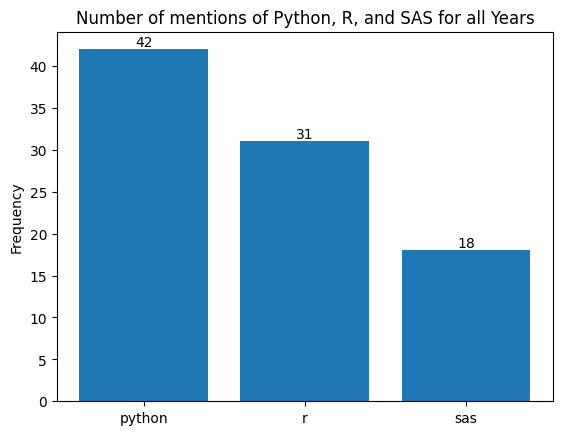

In [109]:
import matplotlib.pyplot as plt

plt.bar(language,frequency)
plt.ylabel("Frequency")
plt.title("Number of mentions of Python, R, and SAS for all Years")
for i, freq in enumerate(frequency):
    plt.text(i, freq, str(freq), ha='center', va='bottom') 
plt.show()